In [3]:
# data manipulation
import pandas as pd
import numpy as np
from readFiles import fullRead

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

from sklearn import preprocessing

def fullRead(pathToTable, sep, anthro = False):

  df_renamed = pd.read_csv(pathToTable, sep = sep, encoding = "latin_1")


  # reading and merging    
  
  if anthro == True:
    df_anthro = pd.read_csv("data/chronicAnthropometricCardiovascularData.csv", sep=";", decimal=",")
    df_renamed = df_renamed.merge(df_anthro)

    # separating by time moment and renaming

    df_renamed["Weight"] = ""
    df_renamed["BMI"] = ""
    df_renamed["Fat"] = ""
    df_renamed["CVRI"] = ""
    df_renamed["Bpmin"] = ""
    df_renamed["Bpmax"] = ""
    df_renamed["Frec"] = ""

    for i in range(len(df_renamed)):

        if df_renamed.loc[i]["Time"] == "Initial":
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso inicial"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Inicial"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa inicial"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV inicial"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin inicial"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax inicial"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec inicial"] 
                
        if df_renamed.loc[i]["Time"] == "Final":
        
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso final"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Final"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa final"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV Final"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin final"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax final"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec final"] 
        
    df_renamed.drop(columns = ["Peso inicial", "Peso final", "Delta Peso", "Talla", "IMC Inicial", "IMC Final", "Delta IMC", "Grasa inicial", "Grasa final", "Delta Grasa", "IRCV Final", "IRCV inicial", "Bpmin final", "Bpmin inicial", "Bpmax final", "Bpmax inicial", "Frec final", "Frec inicial",], inplace=True )
  
  df_renamed.drop(columns = ["Unnamed: 0", "grouping"], inplace=True )
  df_renamed.fillna(0, inplace=True)
  return df_renamed

def scaling(df_read):
   
   scaler = preprocessing.MinMaxScaler()
   numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
   df_read[numCols] = scaler.fit_transform(df_read[numCols])
   return df_read

df1 = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= True))
df2 = scaling(fullRead("data/urineFlav_ord.csv",  sep = ",", anthro= True))
df3 = scaling(fullRead("data/plasmAnt_ord.csv",  sep = ",", anthro= True))
df4 = scaling(fullRead("data/plasmFlav_ord.csv",  sep = ",", anthro= True))

df4.head()

C:\Users\Cristina García\AppData\Local\Temp\ipykernel_10396\77916953.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\Cristina García\AppData\Local\Temp\ipykernel_10396\77916953.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\Cristina García\AppData\Local\Temp\ipykernel_10396\77916953.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\Cristina García\AppData\Local\Temp\ipykernel_10396\77916953.py:68: FutureWarning: In a future version of pandas all arguments of DataFra

numVol         E  E.S  Total.E      HE.G       N.G Sweetener     Time  \
0       1  0.444444  0.1    0.625  0.003582  0.055300        ST  Initial   
1       1  0.333333  0.0    0.000  0.000398  0.031666        ST    Final   
2       2  0.222222  0.1    0.375  0.000199  0.015973        ST  Initial   
3       2  0.333333  0.3    0.000  0.001592  0.015226        ST    Final   
4       3  0.666667  0.0    0.000  0.012338  0.024349        ST    Final   

     Sex    Weight       BMI       Fat      CVRI     Bpmin    Bpmax      Frec  
0  WOMAN  0.335922  0.436090  0.906694  0.421053  0.682540  0.85625  0.583333  
1  WOMAN  0.332039  0.428571  0.831643  0.368421  0.674603  0.75000  0.816667  
2  WOMAN  0.238835  0.390977  0.782961  0.421053  0.642857  0.66875  0.575000  
3  WOMAN  0.231068  0.383459  0.718053  0.315789  0.611111  0.61875  0.675000  
4  WOMAN  0.355340  0.270677  0.746450  0.368421  0.619048  0.65000  0.541667

In [4]:
#EDA

df1.columns
df1.shape
df1.describe()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numVol            250 non-null    int64  
 1   CA                250 non-null    float64
 2   CA.G              250 non-null    float64
 3   CA.S              250 non-null    float64
 4   CA.GS             250 non-null    float64
 5   Total.CA          250 non-null    float64
 6   DHPAA             250 non-null    float64
 7   DHPAA.G           250 non-null    float64
 8   DHPAA.GG          250 non-null    float64
 9   DHPAA.GS          250 non-null    float64
 10  DHPAA.SS          250 non-null    float64
 11  Total.DHPAA       250 non-null    float64
 12  TFA.G             250 non-null    float64
 13  TFA.S             250 non-null    float64
 14  TFA.di.sulfate.1  250 non-null    float64
 15  Total.TFA         250 non-null    float64
 16  TIFA.Sulfate.1    250 non-null    float64
 1

In [6]:
df1.duplicated().sum()

0

In [9]:
# Categorical variables
df1.Sweetener.value_counts()

SU    84
SA    84
ST    82
Name: Sweetener, dtype: int64

<Axes: >

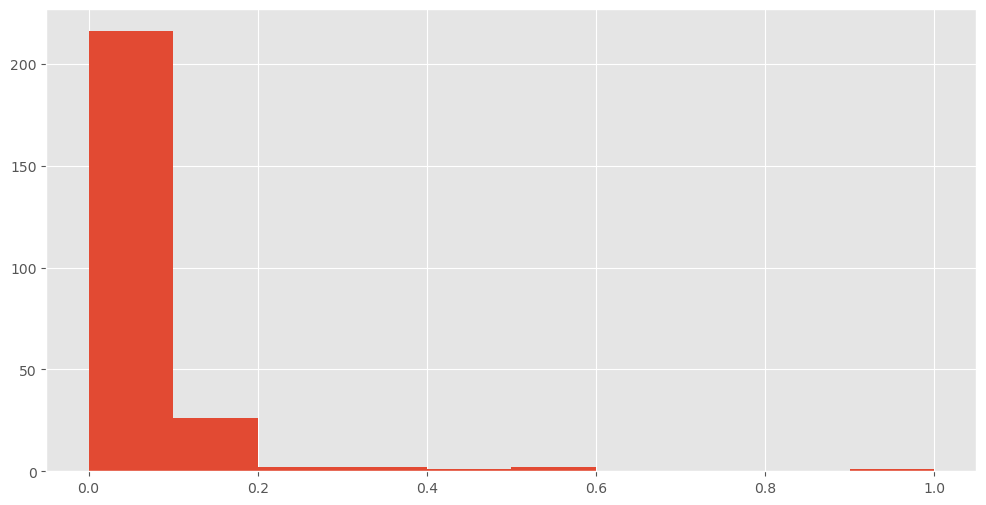

In [11]:
# Numerical variables

df1.VA.hist()

In [12]:
sns.pairplot(df1)

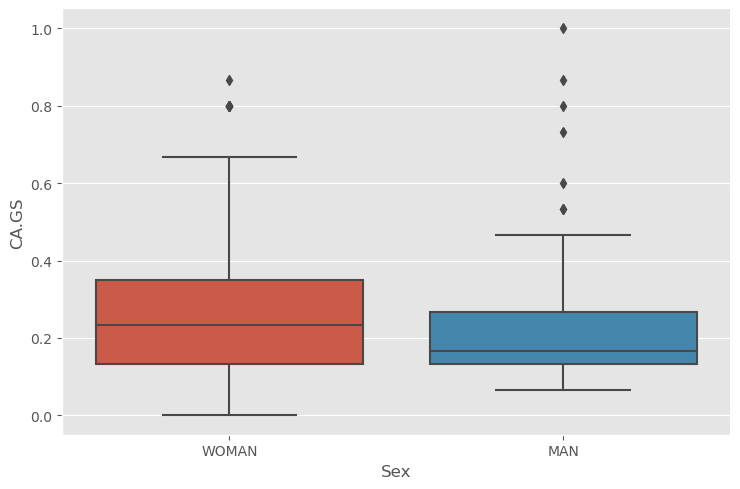

In [14]:
sns.catplot(x="Sex", y="CA.GS", data = df1, kind="box", aspect=1.5)
plt.show()

<Axes: xlabel='VA', ylabel='Weight'>

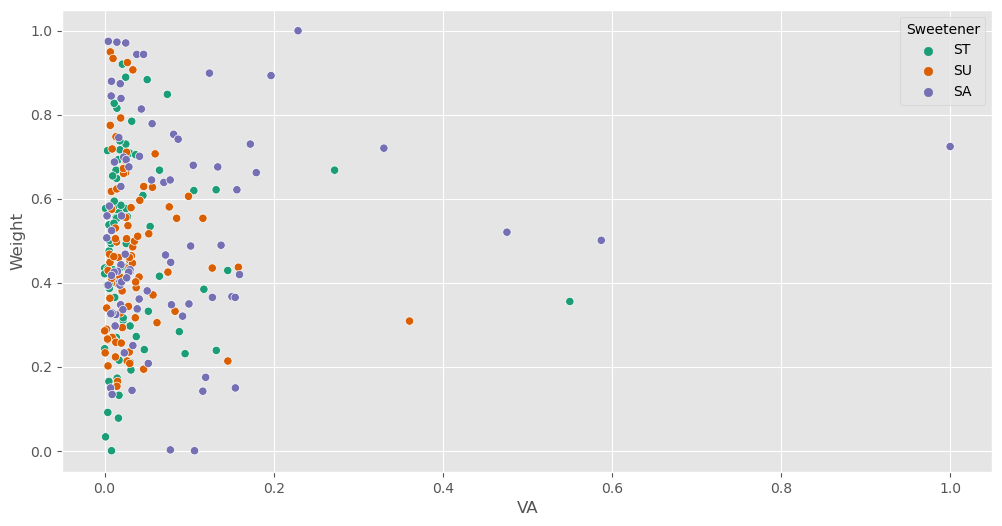

In [25]:
sns.scatterplot(x="VA", y="Weight", hue="Sweetener", data=df1, palette="Dark2")


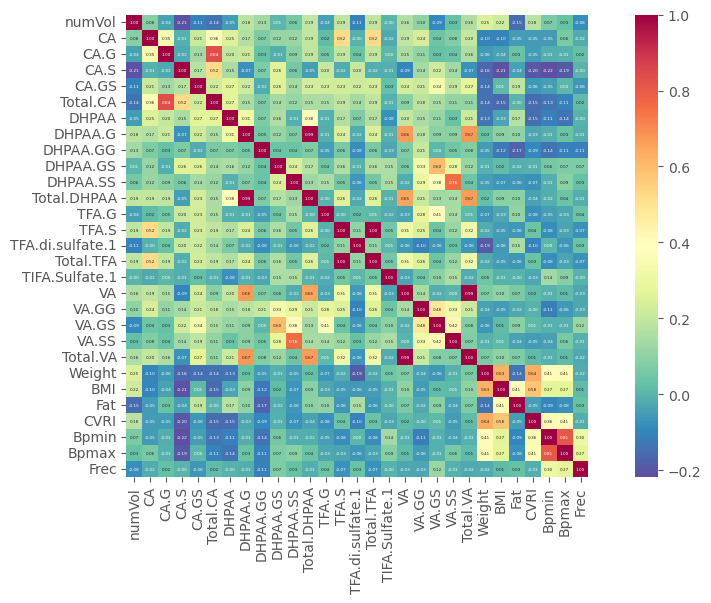

In [33]:
corrmat = df1.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 3}, 
                 yticklabels="auto", 
                 xticklabels="auto", 
                 cmap="Spectral_r")
plt.show()